# UNAD
## Breyner Alexander Parra
## Predicción de Diabetes con Regresión Logística

## Pasos de la Actividad
1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.
2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario
3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características
4. Dividir el dataset en Train y Test para evaluar correctamente el modelo
5. Entrenar el modelo configurando los diferentes hiperparámetros
6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc
7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.
8. Interpretar, analizar y documentar los resultados obtenidos
9. Crear una cuenta en GitHub y cargar los códigos de los modelos diseñados https://github.com/ 

## 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [1]:
#Cargar las librerias necesarias

import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones

# librerías de para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix



In [7]:
# lectura de datos en Python y lo cargamos en la variable Datos

Datos = pd.read_csv('C:/unad/Diabetes.csv')

In [10]:
# Realizamos lectura de los Datos para el análisis exploratorio

Datos.head(10)

,Semanas_Embarazo,Nivel_Glucosa,Presión_Arterial,Grosor_Piel,Nivel_Insulina,IMC,Funcion_Pedigrí,Edad,Diabetico
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [11]:
# Descripción de los datos
Datos.describe()

,Semanas_Embarazo,Nivel_Glucosa,Presión_Arterial,Grosor_Piel,Nivel_Insulina,IMC,Funcion_Pedigrí,Edad,Diabetico
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

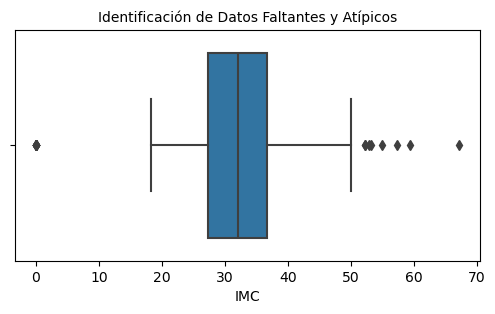

In [12]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['IMC'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

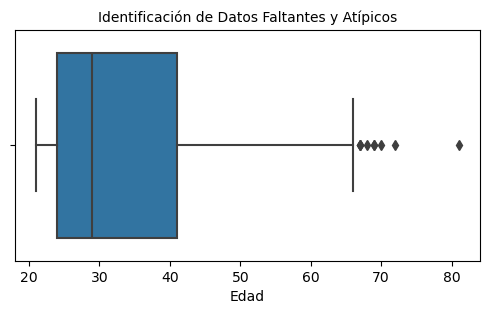

In [13]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Edad'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

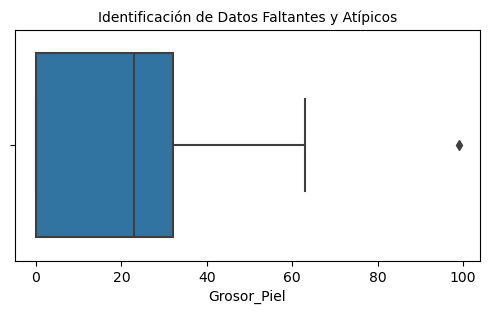

In [14]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Grosor_Piel'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

## 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario

In [15]:
#Revisión de datos faltantes

print("Cantidad de Registros con cero en Nivel de Glucosa: ",Datos['Nivel_Glucosa'].isin([0]).sum())
print("Cantidad de Registros con cero en Presión Arterial: ",Datos['Presión_Arterial'].isin([0]).sum())
print("Cantidad de Registros con cero en Grosor Piel: ",Datos['Grosor_Piel'].isin([0]).sum())
print("Cantidad de Registros con cero en Nivel Insulina: ",Datos['Nivel_Insulina'].isin([0]).sum())
print("Cantidad de Registros con cero en IMC: ",Datos['IMC'].isin([0]).sum())

Cantidad de Registros con cero en Nivel de Glucosa:  5
Cantidad de Registros con cero en Presión Arterial:  35
Cantidad de Registros con cero en Grosor Piel:  227
Cantidad de Registros con cero en Nivel Insulina:  374
Cantidad de Registros con cero en IMC:  11


In [16]:
# Reemplazar todos los ceros con el valor medio (promedio) de la columna.

Datos['Nivel_Glucosa']=Datos['Nivel_Glucosa'].replace(0,Datos['Nivel_Glucosa'].mean())
Datos['Presión_Arterial']=Datos['Presión_Arterial'].replace(0,Datos['Presión_Arterial'].mean())
Datos['Grosor_Piel']=Datos['Grosor_Piel'].replace(0,Datos['Grosor_Piel'].mean())
Datos['Nivel_Insulina']=Datos['Nivel_Insulina'].replace(0,Datos['Nivel_Insulina'].mean())
Datos['IMC']=Datos['IMC'].replace(0,Datos['IMC'].mean())

In [17]:
#Revisión nuevamente de datos faltantes

print("Cantidad de Registros con cero en Nivel de Glucosa: ",Datos['Nivel_Glucosa'].isin([0]).sum())
print("Cantidad de Registros con cero en Presión Arterial: ",Datos['Presión_Arterial'].isin([0]).sum())
print("Cantidad de Registros con cero en Grosor Piel: ",Datos['Grosor_Piel'].isin([0]).sum())
print("Cantidad de Registros con cero en Nivel Insulina: ",Datos['Nivel_Insulina'].isin([0]).sum())
print("Cantidad de Registros con cero en IMC: ",Datos['IMC'].isin([0]).sum())

Cantidad de Registros con cero en Nivel de Glucosa:  0
Cantidad de Registros con cero en Presión Arterial:  0
Cantidad de Registros con cero en Grosor Piel:  0
Cantidad de Registros con cero en Nivel Insulina:  0
Cantidad de Registros con cero en IMC:  0


Text(0.5, 1.0, 'Identificación de Datos Atípicos')

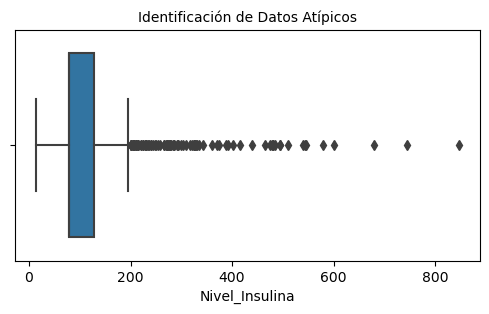

In [18]:
#Identificación de Datos Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Nivel_Insulina'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )

In [19]:
#Conteo de Datos Atípicos

nivel_minimo=20
nivel_maximo=800
Total_Atipicos=((Datos['Nivel_Insulina']<nivel_minimo)|(Datos['Nivel_Insulina']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 6


In [20]:
# Filtra Datos Atípicos

Datos=Datos[(Datos['Nivel_Insulina']<nivel_maximo)&(Datos['Nivel_Insulina']>nivel_minimo)]

In [21]:
# Validar si se removieron los datos atípicos

Total_Atipicos=((Datos['Nivel_Insulina']<nivel_minimo)|(Datos['Nivel_Insulina']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


In [ ]:
#Revisión del tipo de datos y datos faltantes

Datos.info()

## 3.Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características

Característica de interes:
* Diabetico: si la persona tiene diabetes o no (0 = no tiene diabetes - 1 = si tiene diabetes)
* Predecir si una persona puede tener diabetes

In [22]:
# Total de personas con Diabetes

Datos['Diabetico'].value_counts()

Diabetico
0    496
1    266
Name: count, dtype: int64

## 4. Dividir el dataset en Train y Test para evaluar correctamente el modelo

In [23]:
# Porcentaje de datos para entrenamiento (train) = 75% , y para prueba (test) = 25%

# Se crean variables X y Y para almacenar la información del entrenamiento

X = Datos.drop('Diabetico',axis=1) # Se cargan los datos de train sin los datos de la columna Diabetico 
Y = Datos['Diabetico'] # Se cargan los datos de train con los datos de la la columna Diabetico

#La función train_test_split crea una división de un conjunto de datos en dos bloques uno de entrenamiento y otro de prueba (train and test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state= 0)


In [24]:
print (X_train)

     Semanas_Embarazo  Nivel_Glucosa  Presión_Arterial  Grosor_Piel  \
499                 6     154.000000              74.0    32.000000   
183                 5      73.000000              60.0    20.536458   
260                 3     191.000000              68.0    15.000000   
615                 3     106.000000              72.0    20.536458   
114                 7     160.000000              54.0    32.000000   
..                ...            ...               ...          ...   
267                 2     128.000000              64.0    42.000000   
502                 6     120.894531              68.0    41.000000   
218                 5      85.000000              74.0    22.000000   
537                 0      57.000000              60.0    20.536458   
436                12     140.000000              85.0    33.000000   

     Nivel_Insulina   IMC  Funcion_Pedigrí  Edad  
499      193.000000  29.3            0.839    39  
183       79.799479  26.8            0.268   

In [25]:
print (X_test)

     Semanas_Embarazo  Nivel_Glucosa  Presión_Arterial  Grosor_Piel  \
315                 2          112.0              68.0    22.000000   
199                 4          148.0              60.0    27.000000   
341                 1           95.0              74.0    21.000000   
676                 9          156.0              86.0    20.536458   
58                  0          146.0              82.0    20.536458   
..                ...            ...               ...          ...   
432                 1           80.0              74.0    11.000000   
165                 6          104.0              74.0    18.000000   
464                10          115.0              98.0    20.536458   
415                 3          173.0              84.0    33.000000   
241                 4           91.0              70.0    32.000000   

     Nivel_Insulina   IMC  Funcion_Pedigrí  Edad  
315       94.000000  34.1            0.315    26  
199      318.000000  30.9            0.150   

## 5. Entrenar el modelo configurando los diferentes hiperparámetros

In [26]:
# Construir el modelo de regresión logística 

modelo_regresion = LogisticRegression(solver = "liblinear") # liblinear es una libreria para resolver problemas lineales de clasificación y regresión
modelo_regresion.fit (X_train , Y_train)   

# Crea el modelo de prediccion
Prediccion = modelo_regresion.predict(X_test) # la función predict predice los valores a partir del conjunto de datos de validación


In [27]:
X_test.head(10)

,Semanas_Embarazo,Nivel_Glucosa,Presión_Arterial,Grosor_Piel,Nivel_Insulina,IMC,Funcion_Pedigrí,Edad
315,2,112.0,68.0,22.000000,94.000000,34.1,0.315,26
199,4,148.0,60.0,27.000000,318.000000,30.9,0.150,29
341,1,95.0,74.0,21.000000,73.000000,25.9,0.673,36
676,9,156.0,86.0,20.536458,79.799479,24.8,0.230,53
58,0,146.0,82.0,20.536458,79.799479,40.5,1.781,44
649,0,107.0,60.0,25.000000,79.799479,26.4,0.133,23
597,1,89.0,24.0,19.000000,25.000000,27.8,0.559,21
112,1,89.0,76.0,34.000000,37.000000,31.2,0.192,23
467,0,97.0,64.0,36.000000,100.000000,36.8,0.600,25
27,1,97.0,66.0,15.000000,140.000000,23.2,0.487,22


In [28]:
print (Prediccion)

[0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0
 0 0 0 0 1 1 0 0 0 1 0 1 0 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0
 0 1 0 0 1 1 1 1 0 0 0 1 1 1 0 0 1 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 1 0 1 0 0
 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0
 1 0 0 0 1 0]


## 6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc

In [29]:
# Desempeño del modelo de regresión

print(classification_report(Y_test,Prediccion))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83       124
           1       0.71      0.54      0.61        67

    accuracy                           0.76       191
   macro avg       0.74      0.71      0.72       191
weighted avg       0.75      0.76      0.75       191



## 7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo

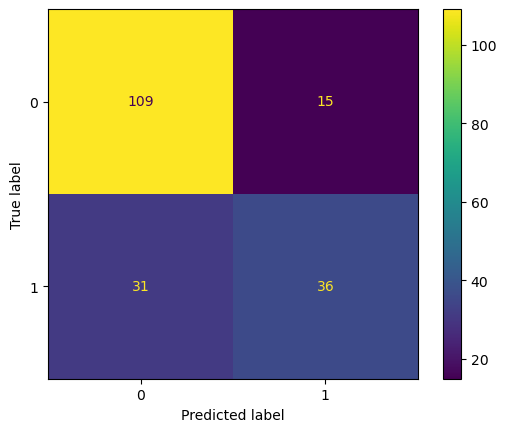

In [30]:
#Matrix de Confusión del modelo

cm=confusion_matrix(Y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

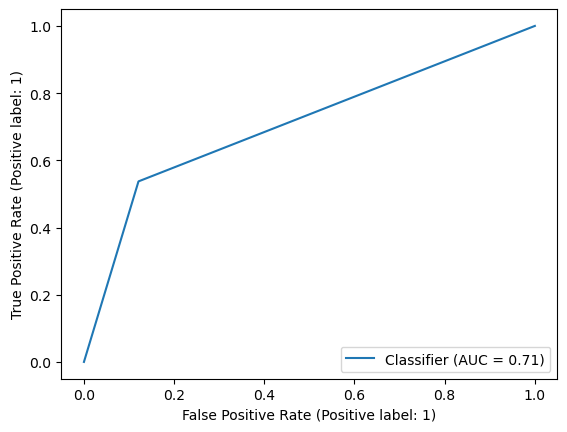

In [31]:
# Curva de precisón del modelo

from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, Prediccion)
plt.show()

## 8. Interpretar, analizar y documentar los resultados obtenidos

Del desempeño del modelo se puede describir:

- Precisión: Precisión mide la proporción de predicciones positivas verdaderas entre todas las predicciones positivas realizadas por el modelo. Aquí la precisión para la clase "diabético" es 0,71, lo que significa que el 71% de los predichos como diabéticos por el modelo eran en realidad diabéticos.

- Recall: Mide la proporción de predicciones positivas verdaderas entre todas las instancias positivas reales en el conjunto de datos. Aquí el Recall para la clase "diabético" es 0,54, lo que indica que el modelo identificó correctamente al 54% de todos los diabéticos.

- F1 Score: Es la media armónica de precisión y recall. Proporciona una puntuación única que equilibra la precisión y recall. Aquí la puntuación F1 para la clase "diabética" es 0,61, lo que indica un equilibrio entre precisión y recall.


De la Matriz de Confusión podemos interpretar:

- Verdaderos negativos: el recuento de observaciones que un clasificador predijo correctamente como falso 109

- Verdaderos positivos: el recuento de observaciones que un clasificador predijo correctamente como Verdadero 36

- Falsos positivos: el recuento de observaciones que un clasificador predijo incorrectamente como Verdaderas 15

- Falsos negativos: el recuento de observaciones que un clasificador predijo incorrectamente como falso 31

De la curva de precisión del modelo se puede interpretar:

- El AUC es 0,71 lo que significa que el 71% de las predicciones del clasificador son correctas en todos los umbrales de clasificación.



## 9. Crear una cuenta en GitHub y cargar los códigos de los modelos diseñados https://github.com/